### Global Power Plant Database Prediction

This project involves building models to predict the `primary_fuel` (classification) and `capacity_mw` (regression) of power plants worldwide. The dataset contains attributes like country, capacity, fuel type, geolocation, and generation data. 

#### Key Steps:
1. **Data Loading & Preprocessing**: The dataset is loaded, irrelevant columns are dropped, and missing values are handled.
2. **Exploratory Data Analysis (EDA)**: Visualizations show the distribution of fuel types and capacities, along with correlations between features.
3. **Feature Engineering**: Categorical variables, such as `primary_fuel` and `country`, are encoded using label encoding and one-hot encoding, respectively.
4. **Data Splitting**: The data is split into training and test sets for the two tasks – predicting `primary_fuel` and `capacity_mw`.
5. **Model Building**: Random Forest models are used for both classification (predicting fuel type) and regression (predicting capacity).
6. **Evaluation**: The classification model’s accuracy and the regression model’s mean squared error (MSE) are calculated.

This workflow provides an effective method to make predictions on power plant characteristics, with further improvements possible through hyperparameter tuning or using more advanced models.


In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv"
df = pd.read_csv(url)
df.describe()





,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


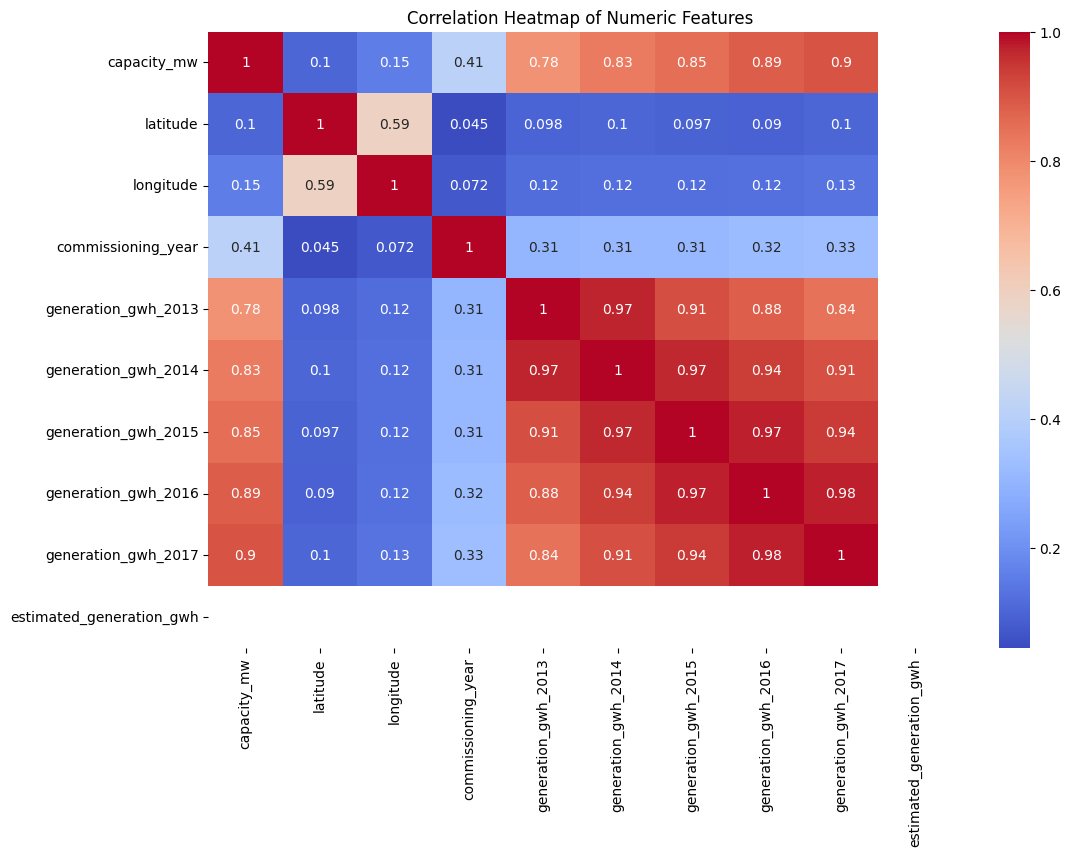

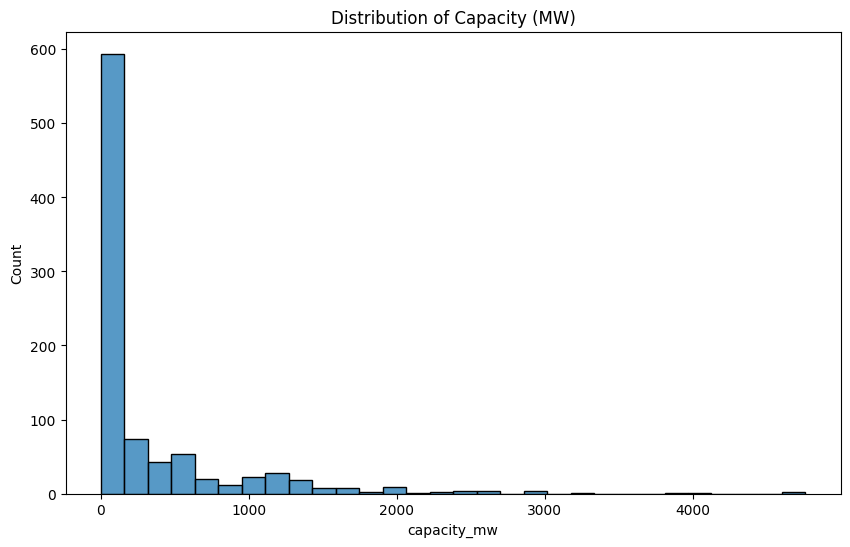

ValueError: could not convert string to float: 'IND'

<Figure size 1200x800 with 0 Axes>

In [4]:
# Step 2: Drop irrelevant columns (keep relevant ones as per your new list)
columns_to_drop = ['other_fuel3', 'wepp_id', 'year_of_capacity_data']
df_cleaned = df.drop(columns=columns_to_drop)

# Step 3: Handle missing values
df_cleaned = df_cleaned.dropna(subset=['primary_fuel', 'capacity_mw'])  # Drop rows with missing target values
df_cleaned.fillna(0, inplace=True)  # Fill other missing values with 0 or another strategy

# Step 4: Exploratory Data Analysis (EDA)

# Filter only numeric columns for the heatmap
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap with numeric columns only
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# Distribution of capacity_mw
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['capacity_mw'], bins=30)
plt.title('Distribution of Capacity (MW)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 5: Feature Engineering
# Label encoding for primary fuel
le = LabelEncoder()
df_cleaned['primary_fuel_encoded'] = le.fit_transform(df_cleaned['primary_fuel'])

# One-hot encoding for categorical features like country (if available)
df_cleaned = pd.get_dummies(df_cleaned, columns=['country'])  # Ensure 'country' column exists

# Step 6: Splitting Data for Prediction
# Split for capacity_mw prediction (regression)
X_capacity = df_cleaned.drop(['capacity_mw'], axis=1)
y_capacity = df_cleaned['capacity_mw']

X_train_cap, X_test_cap, y_train_cap, y_test_cap = train_test_split(X_capacity, y_capacity, test_size=0.2, random_state=42)

# Split for primary_fuel prediction (classification)
X_fuel = df_cleaned.drop(['primary_fuel_encoded'], axis=1)
y_fuel = df_cleaned['primary_fuel_encoded']

X_train_fuel, X_test_fuel, y_train_fuel, y_test_fuel = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)

# Step 7: Model Building and Evaluation

# Random Forest for Primary Fuel Prediction (classification)
rf_fuel = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fuel.fit(X_train_fuel, y_train_fuel)
y_pred_fuel = rf_fuel.predict(X_test_fuel)
print(f'Accuracy for Primary Fuel Prediction: {accuracy_score(y_test_fuel, y_pred_fuel)}')

# Random Forest Regressor for Capacity MW Prediction (regression)
rf_capacity = RandomForestRegressor(n_estimators=100, random_state=42)
rf_capacity.fit(X_train_cap, y_train_cap)
y_pred_capacity = rf_capacity.predict(X_test_cap)
print(f'MSE for Capacity MW Prediction: {mean_squared_error(y_test_cap, y_pred_capacity)}')